In [8]:
# 📦 第一步：导入所需库
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
import nltk
from nltk.corpus import stopwords
import string
import numpy as np

# 下载 NLTK 停用词（第一次运行时需要）
#nltk.download('stopwords')


In [11]:
# 📂 第二步：加载数据
file_path = r"C:\Users\samle\OneDrive\Desktop\COMM5007\Group_Assignment\comments_partial_000.csv"
df = pd.read_csv(file_path)

# 显示前几行数据
df.head()


,video_id,author,comment,likeCount,publishedAt
0,ad79nYk2keg,@SimplilearnOfficial,🔥Caltech Post Graduate Program In AI And Machi...,186,2021-09-08T12:54:19Z
1,ad79nYk2keg,@JasmineDavis-u8g,Thank you.,0,2025-03-04T02:30:27Z
2,ad79nYk2keg,@vish5kamdi335,An AI robot with citizenship,0,2025-01-13T10:49:30Z
3,ad79nYk2keg,@xiaojunwei-or8js,Finally! I find the best teacher!,0,2025-01-03T04:48:19Z
4,ad79nYk2keg,@GraphinklyStudio,This is a well-thought-out and insightful piec...,0,2024-11-24T04:33:28Z


In [12]:
# 🧹 第三步：数据清洗

# 去除空值评论
df = df.dropna(subset=['comment'])

# 转换发布时间为 datetime 类型
df['publishedAt'] = pd.to_datetime(df['publishedAt'], errors='coerce')

# 去除重复评论（可选）
df = df.drop_duplicates(subset=['comment'])

# 文本清洗函数
def clean_text(text):
    text = text.lower()
    text = ''.join(char for char in text if char not in string.punctuation)
    return text

df['clean_comment'] = df['comment'].apply(clean_text)

# 显示清洗后的数据
df[['comment', 'clean_comment']].head()


,comment,clean_comment
0,🔥Caltech Post Graduate Program In AI And Machi...,🔥caltech post graduate program in ai and machi...
1,Thank you.,thank you
2,An AI robot with citizenship,an ai robot with citizenship
3,Finally! I find the best teacher!,finally i find the best teacher
4,This is a well-thought-out and insightful piec...,this is a wellthoughtout and insightful piece ...


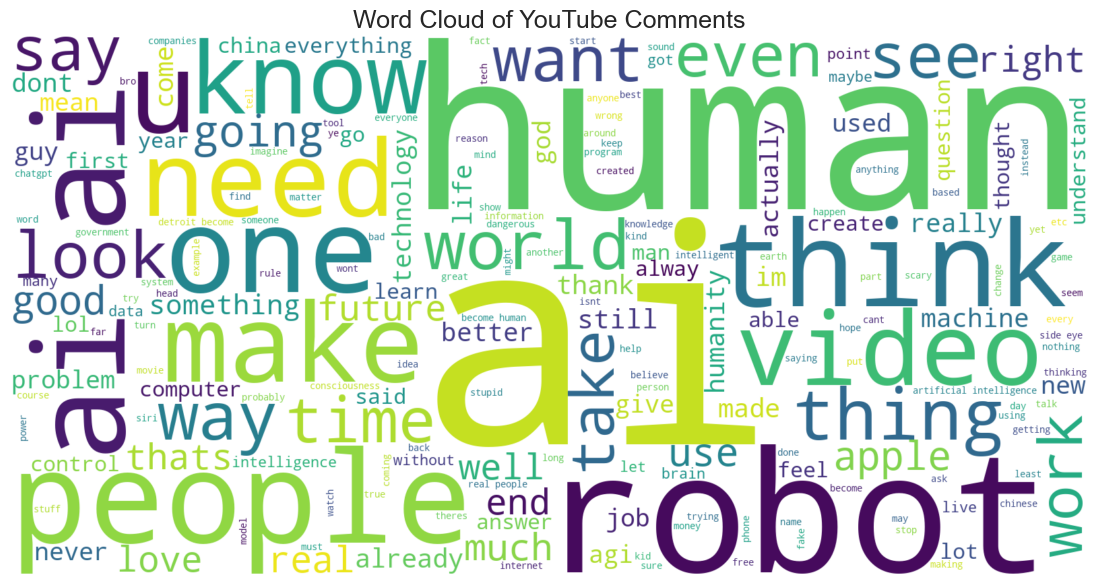

In [13]:
# ☁️ 第四步：生成词云

# 构建停用词表
stop_words = set(stopwords.words('english') + list(STOPWORDS))

# 拼接所有评论
all_text = ' '.join(df['clean_comment'].dropna().tolist())

# 生成词云
wordcloud = WordCloud(stopwords=stop_words,
                      background_color='white',
                      max_words=200,
                      width=1600,
                      height=800).generate(all_text)

# 显示词云
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of YouTube Comments", fontsize=18)
plt.show()


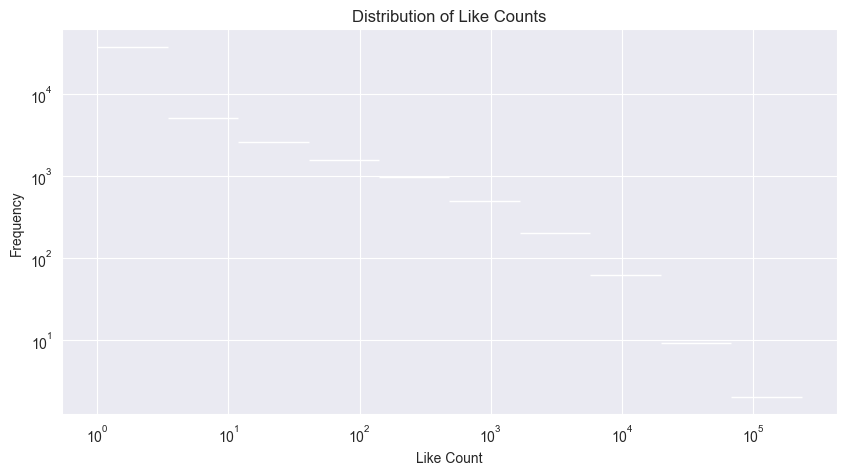

In [14]:
# 📊 第五步：探索性数据可视化分析

# 评论点赞数分布
plt.figure(figsize=(10, 5))
sns.histplot(df['likeCount'], bins=10, log_scale=(True, True))
plt.title("Distribution of Like Counts")
plt.xlabel("Like Count")
plt.ylabel("Frequency")
plt.show()


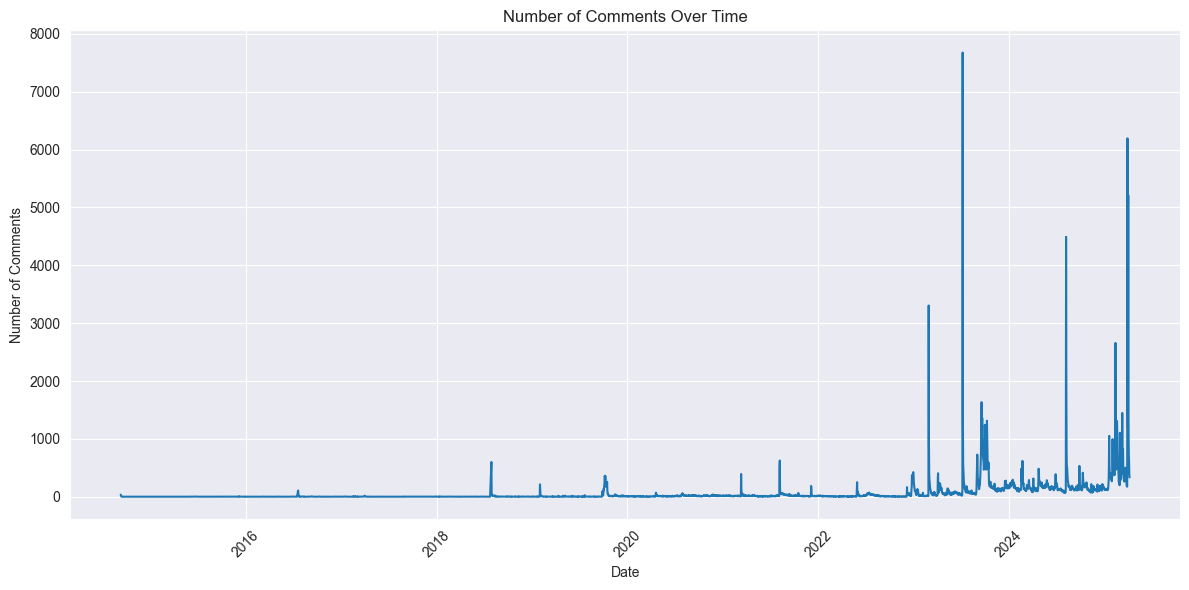

In [15]:
# 评论数量随时间变化趋势
df['date'] = df['publishedAt'].dt.date
daily_counts = df.groupby('date').size()

plt.figure(figsize=(12, 6))
daily_counts.plot()
plt.title("Number of Comments Over Time")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


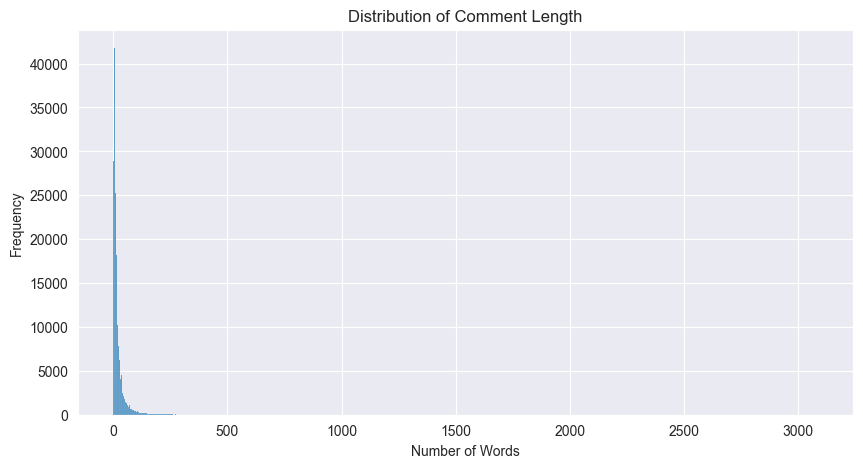

In [16]:
# 评论长度分布（按词数）
df['comment_length'] = df['clean_comment'].apply(lambda x: len(x.split()))

plt.figure(figsize=(10, 5))
sns.histplot(df['comment_length'], bins=1000)
plt.title("Distribution of Comment Length")
plt.xlabel("Number of Words")
plt.ylabel("Frequency")
plt.show()


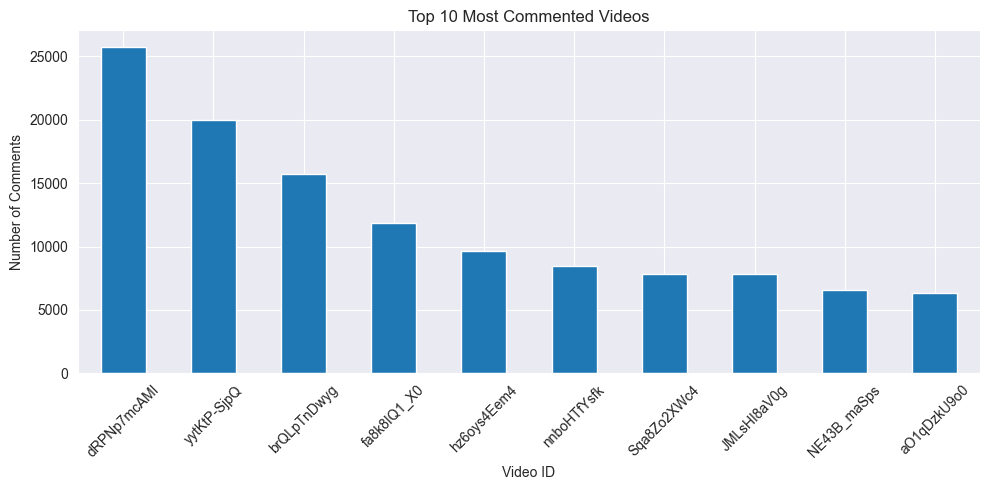

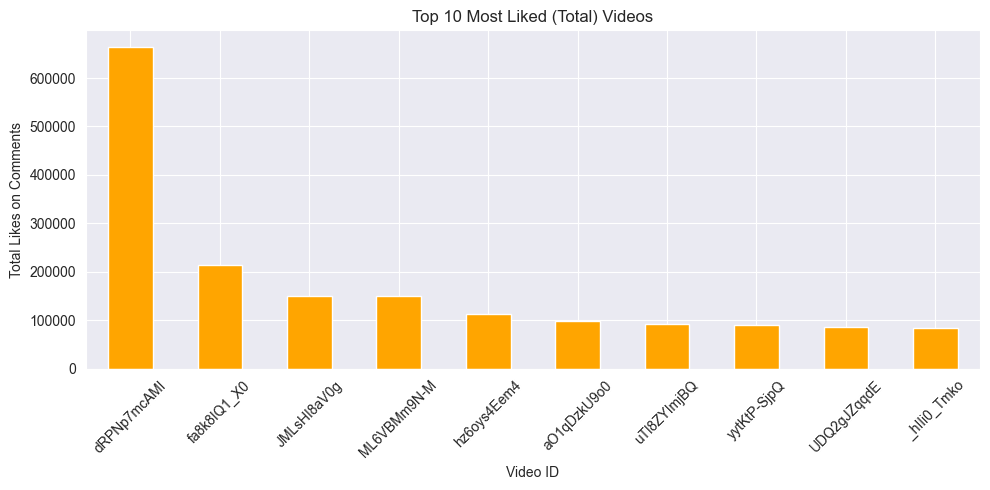

In [17]:
# 📈 第六步：每个视频的评论数量和点赞总数分析

# 评论最多的视频 Top 10
top_commented_videos = df['video_id'].value_counts().head(10)
plt.figure(figsize=(10,5))
top_commented_videos.plot(kind='bar')
plt.title("Top 10 Most Commented Videos")
plt.xlabel("Video ID")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 点赞总数最多的视频 Top 10
video_like_stats = df.groupby('video_id')['likeCount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
video_like_stats.plot(kind='bar', color='orange')
plt.title("Top 10 Most Liked (Total) Videos")
plt.xlabel("Video ID")
plt.ylabel("Total Likes on Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


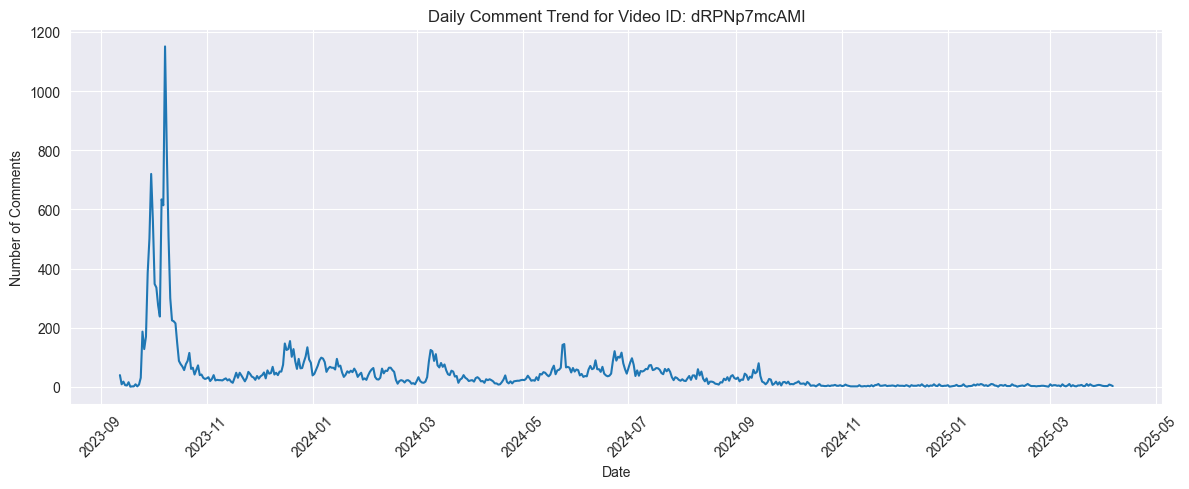

In [18]:
# 🔄 第七步：单个视频的评论热度趋势（按天）

# 选一个热门视频 ID（评论最多的第一个）
selected_video_id = top_commented_videos.index[0]
df_video = df[df['video_id'] == selected_video_id]
df_video_grouped = df_video.groupby(df_video['publishedAt'].dt.date).size()

plt.figure(figsize=(12,5))
df_video_grouped.plot()
plt.title(f"Daily Comment Trend for Video ID: {selected_video_id}")
plt.xlabel("Date")
plt.ylabel("Number of Comments")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


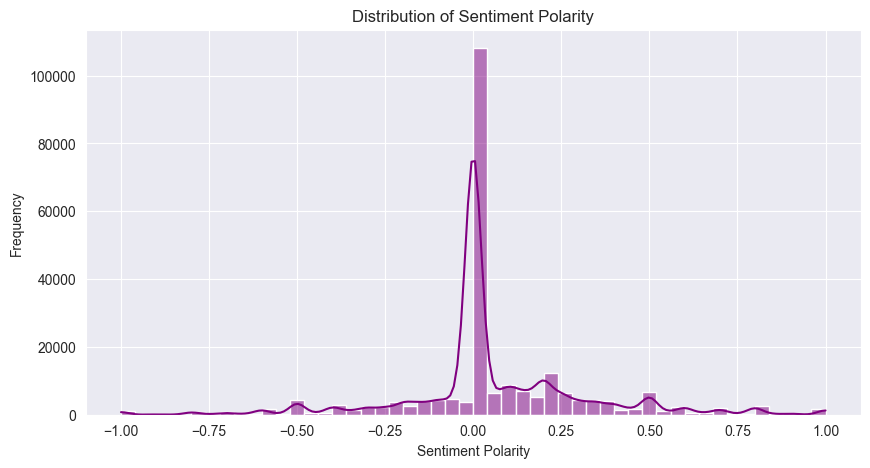

In [21]:
# ❤️ 第八步：情感分析（TextBlob）

from textblob import TextBlob

# 使用 TextBlob 分析情感倾向（极性 -1 ~ +1）
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['clean_comment'].apply(get_sentiment)

# 可视化情感分布
plt.figure(figsize=(10,5))
sns.histplot(df['sentiment'], bins=50, kde=True, color='purple')
plt.title("Distribution of Sentiment Polarity")
plt.xlabel("Sentiment Polarity")
plt.ylabel("Frequency")
plt.show()


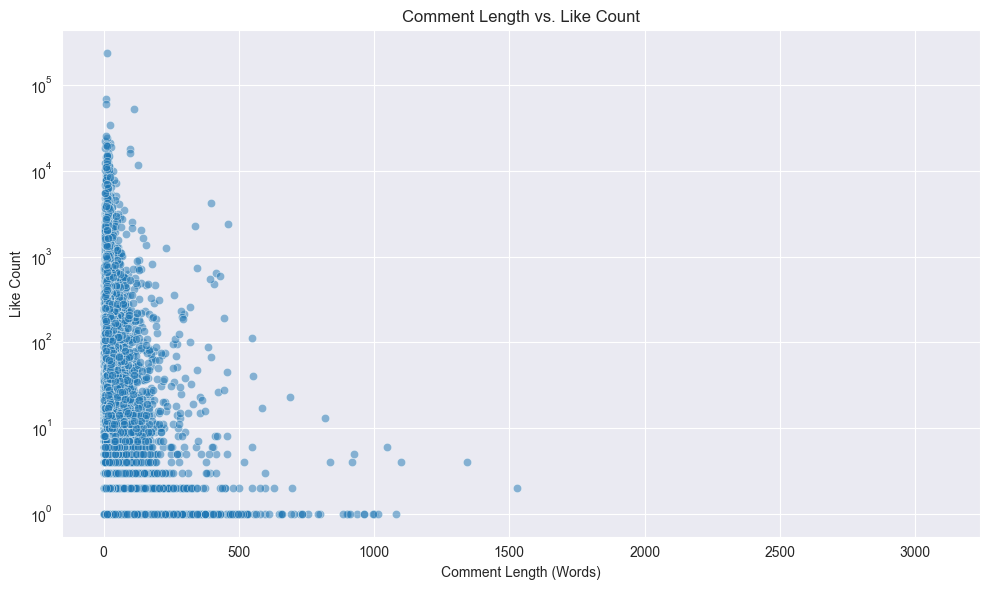

In [22]:
# 📝 第九步：评论长度 vs 点赞数（散点图）

plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='comment_length', y='likeCount', alpha=0.5)
plt.title("Comment Length vs. Like Count")
plt.xlabel("Comment Length (Words)")
plt.ylabel("Like Count")
plt.yscale('log')
plt.tight_layout()
plt.show()


C:\Users\samle\AppData\Local\Temp\ipykernel_24420\3841160211.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tfidf_df, x='score', y='word', palette='viridis')


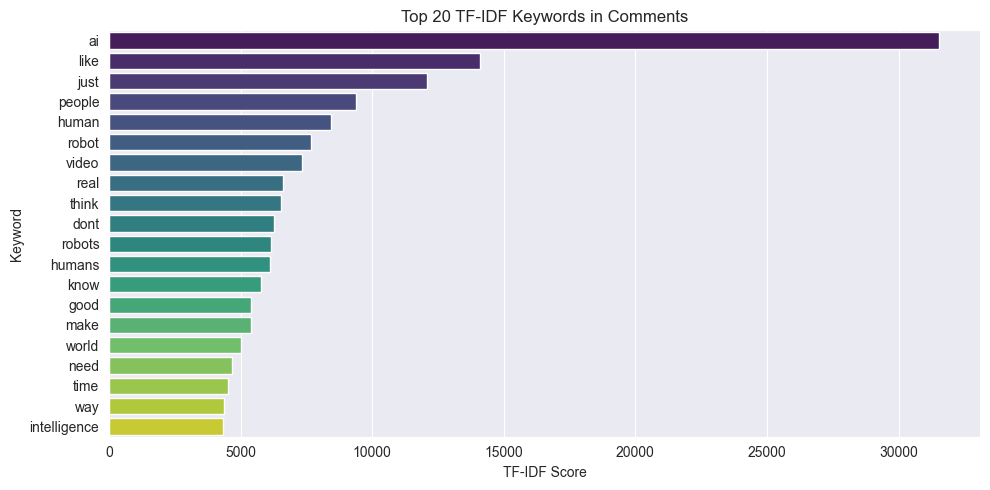

In [23]:
# 🔤 第十步：关键词提取（TF-IDF）

from sklearn.feature_extraction.text import TfidfVectorizer

# 初始化 TF-IDF 向量器
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(df['clean_comment'])

# 提取关键词
tfidf_words = vectorizer.get_feature_names_out()
tfidf_scores = X.sum(axis=0).A1

# 生成关键词 DataFrame
tfidf_df = pd.DataFrame({'word': tfidf_words, 'score': tfidf_scores})
tfidf_df = tfidf_df.sort_values(by='score', ascending=False)

# 可视化 TF-IDF Top 关键词
plt.figure(figsize=(10,5))
sns.barplot(data=tfidf_df, x='score', y='word', palette='viridis')
plt.title("Top 20 TF-IDF Keywords in Comments")
plt.xlabel("TF-IDF Score")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()


C:\Users\samle\AppData\Local\Temp\ipykernel_24420\3151829522.py:23: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\samle\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128197 (\N{CALENDAR}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


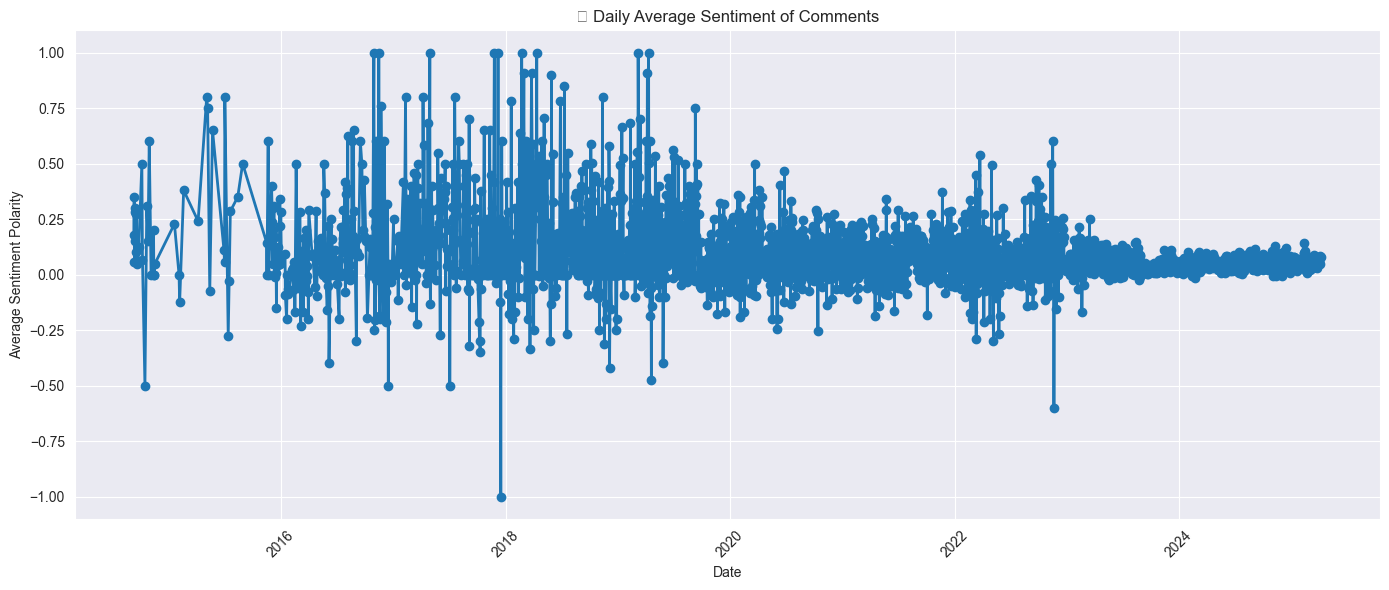

In [24]:
# 📉 第十一步：每日情绪变化分析 + 异常点检测

# 先确保我们已有情绪分析列（如果没有，请确保你已运行情感分析模块）
# df['sentiment'] 应该已经存在

# 将日期作为分组依据
df['date'] = df['publishedAt'].dt.date

# 计算每日平均情感极性
daily_sentiment = df.groupby('date')['sentiment'].mean()

# 计算每日评论总数（用于权重衡量）
daily_comment_count = df.groupby('date').size()

# 可视化情绪曲线
plt.figure(figsize=(14,6))
daily_sentiment.plot(marker='o', linewidth=2)
plt.title("📅 Daily Average Sentiment of Comments")
plt.xlabel("Date")
plt.ylabel("Average Sentiment Polarity")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


C:\Users\samle\AppData\Local\Temp\ipykernel_24420\3028824422.py:22: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\samle\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


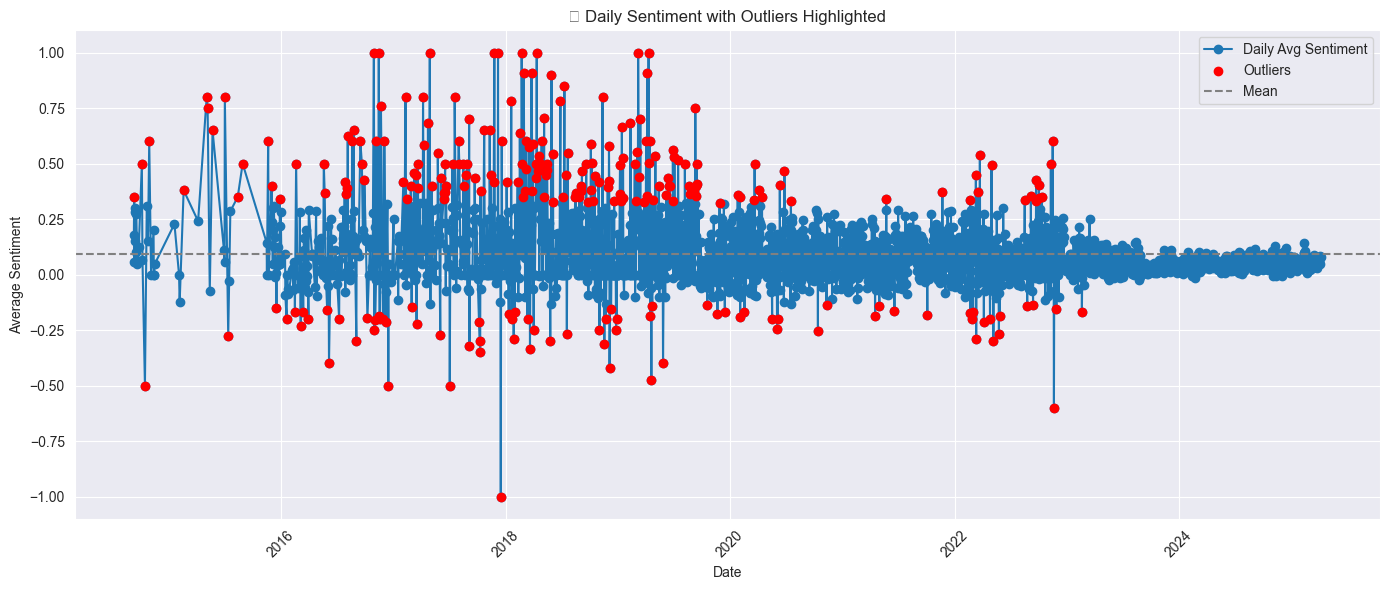

,Date,Avg_Sentiment
95,2017-12-16,-1.0
263,2022-11-20,-0.6
49,2016-12-15,-0.5
2,2014-10-15,-0.5
73,2017-07-03,-0.5
...,...,...
178,2019-03-08,1.0
121,2018-04-12,1.0
185,2019-04-11,1.0
38,2016-10-29,1.0


In [25]:
# ⚠️ 第十二步：检测情绪异常点（快速简易版）

# 设定阈值：标准差方式检测异常
mean_sentiment = daily_sentiment.mean()
std_sentiment = daily_sentiment.std()

# 定义异常条件（可调节灵敏度）
threshold = 1.5
outliers = daily_sentiment[(daily_sentiment - mean_sentiment).abs() > threshold * std_sentiment]

# 可视化异常情绪日期
plt.figure(figsize=(14,6))
daily_sentiment.plot(marker='o', label='Daily Avg Sentiment')
plt.scatter(outliers.index, outliers.values, color='red', label='Outliers', zorder=5)
plt.axhline(mean_sentiment, color='gray', linestyle='--', label='Mean')
plt.title("🔍 Daily Sentiment with Outliers Highlighted")
plt.xlabel("Date")
plt.ylabel("Average Sentiment")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 展示异常点详情
outliers_df = outliers.reset_index()
outliers_df.columns = ['Date', 'Avg_Sentiment']
outliers_df.sort_values(by='Avg_Sentiment')


情绪异常的日期和平均情绪值：


,Date,Avg_Sentiment
95,2017-12-16,-1.0
263,2022-11-20,-0.6
49,2016-12-15,-0.5
2,2014-10-15,-0.5
73,2017-07-03,-0.5
...,...,...
178,2019-03-08,1.0
121,2018-04-12,1.0
185,2019-04-11,1.0
38,2016-10-29,1.0


C:\Users\samle\AppData\Local\Temp\ipykernel_24420\3014500864.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tfidf_anomaly_df, y='word', x='score', palette='coolwarm')
C:\Users\samle\AppData\Local\Temp\ipykernel_24420\3014500864.py:32: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\samle\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128204 (\N{PUSHPIN}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


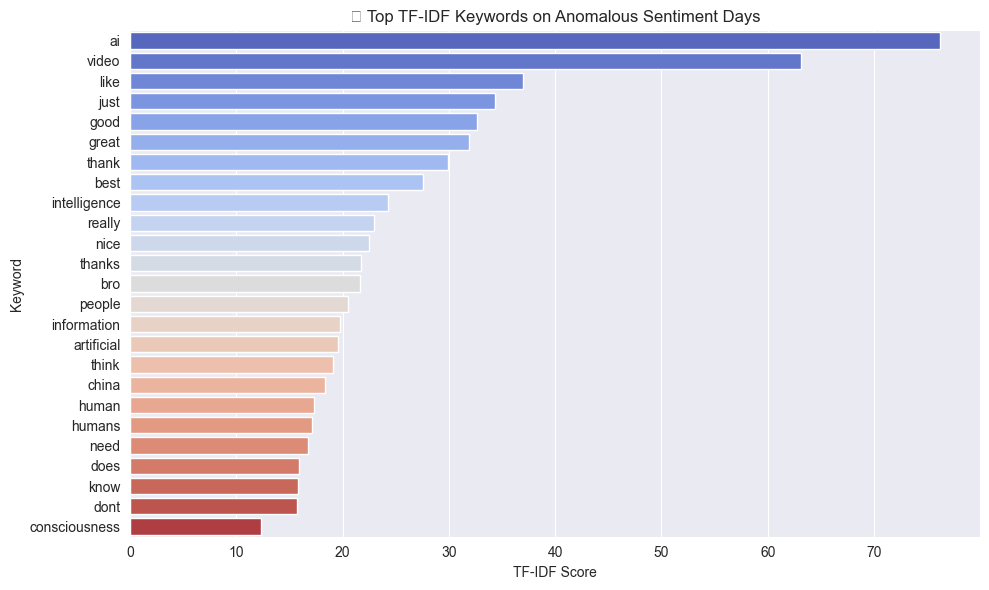

In [26]:
# 🔎 第十三步：分析情绪异常日期的评论内容（TF-IDF）

# 获取异常日期列表
anomaly_dates = outliers.index.tolist()

# 过滤这些日期的评论数据
anomaly_df = df[df['date'].isin(anomaly_dates)]

# 简单打印异常日期和该日平均情绪
print("情绪异常的日期和平均情绪值：")
display(outliers_df.sort_values(by='Avg_Sentiment'))

# 初始化 TF-IDF 向量器
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(max_features=25, stop_words='english')
X = vectorizer.fit_transform(anomaly_df['clean_comment'])

# 得到关键词及其对应 TF-IDF 分数
words = vectorizer.get_feature_names_out()
scores = X.sum(axis=0).A1

tfidf_anomaly_df = pd.DataFrame({'word': words, 'score': scores})
tfidf_anomaly_df = tfidf_anomaly_df.sort_values(by='score', ascending=False)

# 可视化关键词
plt.figure(figsize=(10,6))
sns.barplot(data=tfidf_anomaly_df, y='word', x='score', palette='coolwarm')
plt.title("📌 Top TF-IDF Keywords on Anomalous Sentiment Days")
plt.xlabel("TF-IDF Score")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()


C:\Users\samle\AppData\Local\Temp\ipykernel_24420\2998860835.py:41: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\samle\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128101 (\N{BUSTS IN SILHOUETTE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


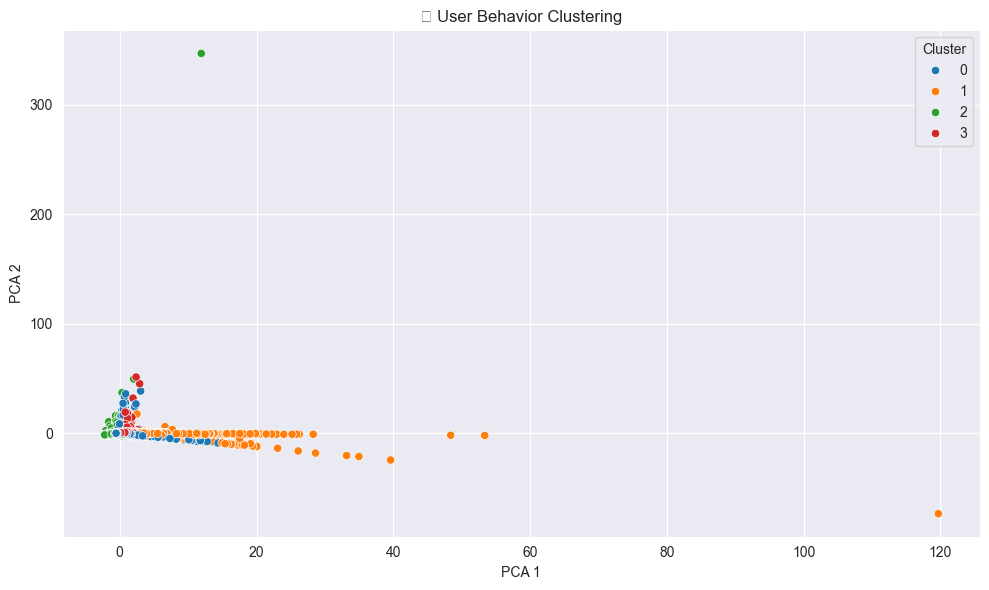

In [27]:
# 👥 第十四步：用户行为聚类分析（KMeans）

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# 聚合用户行为数据
user_df = df.groupby('author').agg({
    'comment': 'count',
    'sentiment': 'mean',
    'comment_length': 'mean',
    'likeCount': 'mean'
}).rename(columns={
    'comment': 'comment_count',
    'sentiment': 'avg_sentiment',
    'comment_length': 'avg_length',
    'likeCount': 'avg_likes'
}).dropna()

# 标准化
scaler = StandardScaler()
user_scaled = scaler.fit_transform(user_df)

# 聚类（设为4类，方便可视化）
kmeans = KMeans(n_clusters=4, random_state=42)
user_df['cluster'] = kmeans.fit_predict(user_scaled)

# 使用 PCA 降维可视化
pca = PCA(n_components=2)
pca_result = pca.fit_transform(user_scaled)
user_df['pca_x'] = pca_result[:, 0]
user_df['pca_y'] = pca_result[:, 1]

# 可视化聚类
plt.figure(figsize=(10,6))
sns.scatterplot(data=user_df, x='pca_x', y='pca_y', hue='cluster', palette='tab10')
plt.title("👥 User Behavior Clustering")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


C:\Users\samle\AppData\Local\Temp\ipykernel_24420\907153533.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tfidf_topliked_df, y='word', x='score', palette='magma')
C:\Users\samle\AppData\Local\Temp\ipykernel_24420\907153533.py:22: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\samle\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128293 (\N{FIRE}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


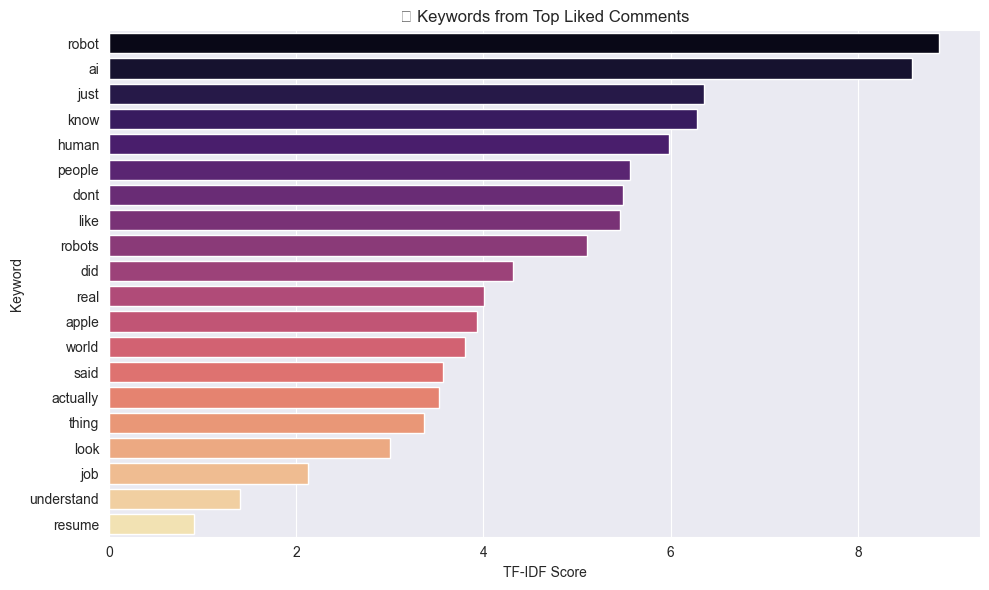

In [28]:
# 🔥 第十五步：高互动评论关键词分析（点赞高的前100条）

# 选出点赞最高的评论
top_liked_comments = df.sort_values(by='likeCount', ascending=False).head(100)

# 提取关键词（TF-IDF）
vectorizer = TfidfVectorizer(max_features=20, stop_words='english')
X = vectorizer.fit_transform(top_liked_comments['clean_comment'])

words = vectorizer.get_feature_names_out()
scores = X.sum(axis=0).A1

tfidf_topliked_df = pd.DataFrame({'word': words, 'score': scores})
tfidf_topliked_df = tfidf_topliked_df.sort_values(by='score', ascending=False)

# 可视化
plt.figure(figsize=(10,6))
sns.barplot(data=tfidf_topliked_df, y='word', x='score', palette='magma')
plt.title("🔥 Keywords from Top Liked Comments")
plt.xlabel("TF-IDF Score")
plt.ylabel("Keyword")
plt.tight_layout()
plt.show()


In [29]:
# 🤖 A1 模块：点赞潜力预测模型（逻辑回归）

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

# 构建标签：点赞数 >= 10 认为是高互动
df['is_popular'] = (df['likeCount'] >= 10).astype(int)

# 构建特征
features = df[['comment_length', 'sentiment']]
features = features.dropna()
labels = df.loc[features.index, 'is_popular']

# 拆分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3, random_state=42)

# 训练逻辑回归模型
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# 输出分类效果
print("🔍 点赞预测模型效果（分类报告）")
print(classification_report(y_test, y_pred))


🔍 点赞预测模型效果（分类报告）
              precision    recall  f1-score   support

           0       0.97      1.00      0.99     67393
           1       0.00      0.00      0.00      1943

    accuracy                           0.97     69336
   macro avg       0.49      0.50      0.49     69336
weighted avg       0.94      0.97      0.96     69336



🔥 高影响力评论 TOP 10


,comment,likeCount,sentiment,impact_score
63338,2025: Are these robots or real people?\n2090: ...,234803,0.200000,281763.600000
50765,Doctor: What's ur blood type?\nRobot: Oil,68311,0.000000,68311.000000
85175,Huge correction:In the original thought experi...,52986,0.121154,59405.457692
95207,The solution is easy: make the AI think humans...,34321,0.466667,50337.466667
105808,"this was both, humorous and terrifying at the ...",59794,-0.166667,49828.333333
34288,My favorite thing about Tom is that he is a ve...,21158,0.600000,33852.800000
100854,"Humanity: ""You will save us right?""\nAI: ""I ne...",20082,0.285714,25819.714286
53934,Plot twist: These are cakes\n\nedit: help thx ...,24366,0.000000,24366.000000
53824,That one robot: 👀 **side eye**,22580,0.000000,22580.000000
31276,"Almost a decade ago, I attended a job fair whi...",17985,0.176190,21153.785714


C:\Users\samle\AppData\Local\Temp\ipykernel_24420\1309975629.py:20: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\samle\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128161 (\N{ELECTRIC LIGHT BULB}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


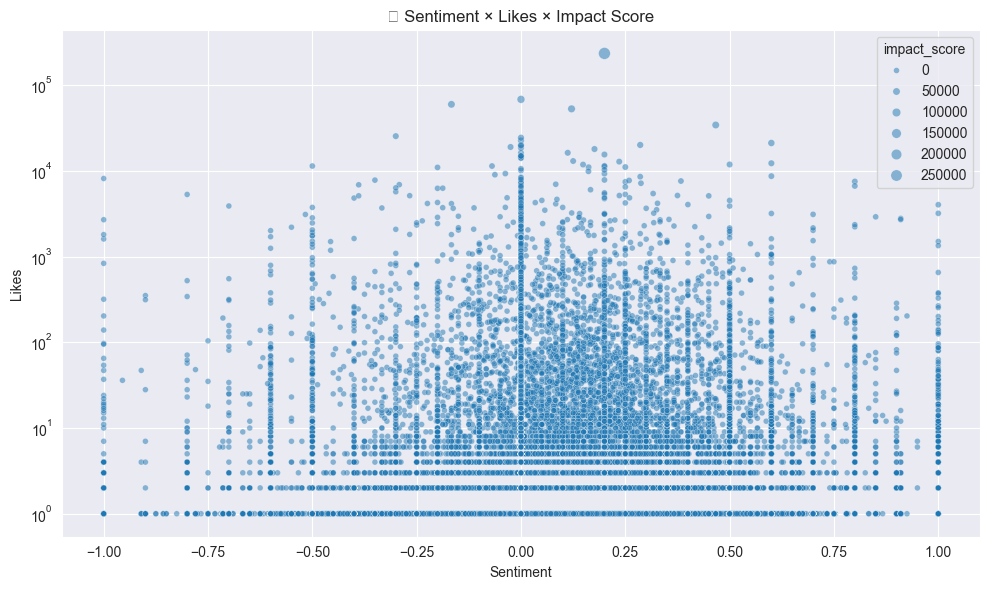

In [30]:
# 💥 A4 模块：构造影响力指标（点赞 × 情绪强度）

# 构造评分（将负面情绪也参与进来）
df['impact_score'] = df['likeCount'] * (1 + df['sentiment'])

# 排名前10的高影响力评论
top_impact = df[['comment', 'likeCount', 'sentiment', 'impact_score']].sort_values(by='impact_score', ascending=False).head(10)

# 展示高影响评论
print("🔥 高影响力评论 TOP 10")
display(top_impact)

# 可视化情绪 & 点赞的互动关系
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='sentiment', y='likeCount', size='impact_score', alpha=0.5)
plt.title("💡 Sentiment × Likes × Impact Score")
plt.xlabel("Sentiment")
plt.ylabel("Likes")
plt.yscale('log')
plt.tight_layout()
plt.show()


C:\Users\samle\AppData\Local\Temp\ipykernel_24420\3860378779.py:14: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) Arial.
  plt.tight_layout()
C:\Users\samle\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129516 (\N{DNA DOUBLE HELIX}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


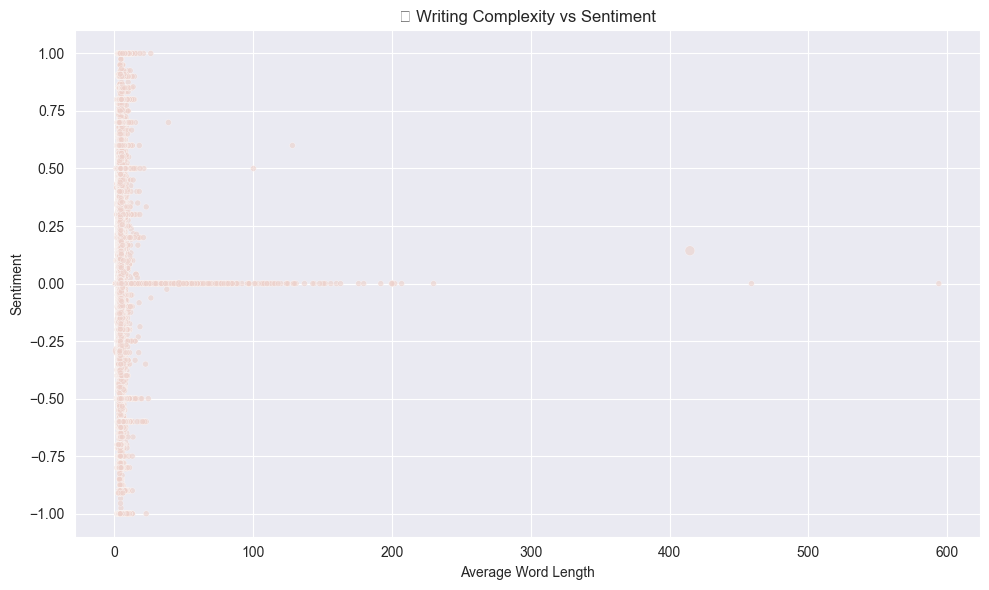

In [31]:
# 📚 A5 模块：结构性复杂度指标提取

# 特征提取
df['punct_count'] = df['comment'].apply(lambda x: sum(1 for c in str(x) if c in string.punctuation))
df['capital_ratio'] = df['comment'].apply(lambda x: sum(1 for c in str(x) if c.isupper()) / len(str(x)) if len(str(x)) > 0 else 0)
df['avg_word_len'] = df['comment'].apply(lambda x: np.mean([len(w) for w in str(x).split()]) if x else 0)

# 散点图：结构 vs 情绪
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='avg_word_len', y='sentiment', hue='likeCount', size='punct_count', alpha=0.6, legend=False)
plt.title("🧬 Writing Complexity vs Sentiment")
plt.xlabel("Average Word Length")
plt.ylabel("Sentiment")
plt.tight_layout()
plt.show()
